In [76]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('data_key_words.csv')

In [78]:
df.head()

,Unnamed: 0,key_words_rak,key_words_tf_idf
0,0,",teacher expectations affect student outcomes,...",",stem,women,instructors,role,college,identity,..."
1,1,",date types generation strategies,“biggest des...",",youth,community,making,spaces,stem,youths,pra..."
2,2,NaN,",epistemic agency,epistemic,ms,agency,light,mr..."
3,3,NaN,",ideas,energy,network,phenomena,network analys..."
4,4,NaN,",complex systems,complex,systems,kapur,cogniti..."


In [79]:
rootdir = 'data/papers'
contents = []
i = 0
source = []
errors = []
year = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if 'txt' in file:
            i += 1
            path = os.path.join(subdir, file)
            with open(path) as file:
                year.append(int(path.split('/')[-1][:4]))
                try:
                    text = file.read()
                    if len(text)> 10 :
                        contents.append(text)
                    source.append(subdir[len(rootdir):])
                except:
                    name, message, content = sys.exc_info()
                    errors.append(message)


In [80]:
beg_ind = contents[7].find('Keywords')
contents[7][beg_ind:contents[7].find('\r', beg_ind )]

'Keywords: equity, justice, mathematics education, whiteness\n\nMathematics education as a white institutional space\n\nEquity has been an important, long-standing goal in mathematics education. Although efforts toward equity and\njustice in mathematics education through research and teacher education are making an impact on the field, this\nwork remains situated within broader systems of privilege and oppression that support and constrain these\nefforts in various ways. In 2008, mathematics education researcher Danny Martin called on stakeholders in\nmathematics education research and policy to recognize the field as largely a white institutional space. Feagin\nand Moore (as cited in Martin, 2008) characterize white institutional space as ideologies and practices in a\ncontext, framed as “neutral” or “fair,” that serve to maintain white supremacy. In this characterization, white\nprivilege is maintained through mundane, transparent practices that operate (often) beyond the conscious\n

In [81]:
titles = [content[:content.find('\r')] for content in contents ]

In [82]:
df = df.merge(pd.DataFrame(titles),right_index= True, left_index=True)
df.rename(columns ={0 : 'titles'},inplace = True)

In [83]:
df.head()

,Unnamed: 0,key_words_rak,key_words_tf_idf,titles
0,0,",teacher expectations affect student outcomes,...",",stem,women,instructors,role,college,identity,...",Encountering and Becoming Role Models: Combati...
1,1,",date types generation strategies,“biggest des...",",youth,community,making,spaces,stem,youths,pra...","Mobilities of Criticality: Space-Making, Ident..."
2,2,NaN,",epistemic agency,epistemic,ms,agency,light,mr...",Redistributing Epistemic Agency: How Teachers ...
3,3,NaN,",ideas,energy,network,phenomena,network analys...",Measuring Integrated Knowledge – A Network Ana...
4,4,NaN,",complex systems,complex,systems,kapur,cogniti...",Rising Above? Implications of Complexity for T...


In [84]:
df['keywords_intext'] = ''

In [85]:
tmp_content = []
tmp_years = []
for i,text_ in enumerate(contents):
    
    selection = text_[:text_.find('\r\rReferences\r')]
    if '...............................' in selection :
        continue
    tmp_years.append(year[i])
    tmp_content.append(selection)

In [86]:
df['year'] = 0
for i,text in enumerate(tmp_content): 
    beg_ind = text.find('Keywords')
    if beg_ind != -1: 
        df['keywords_intext'][i] = text[beg_ind+10:text.find('\r', beg_ind)]
    else : 
        df['keywords_intext'][i] = ''
    df['year'][i] = tmp_years[i] 
    

/Users/zhenchensu/anaconda2/envs/ada/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zhenchensu/anaconda2/envs/ada/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zhenchensu/anaconda2/envs/ada/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [87]:
df.head()

,Unnamed: 0,key_words_rak,key_words_tf_idf,titles,keywords_intext,year
0,0,",teacher expectations affect student outcomes,...",",stem,women,instructors,role,college,identity,...",Encountering and Becoming Role Models: Combati...,"Community Engagement, Outreach, Informal Learn...",2018
1,1,",date types generation strategies,“biggest des...",",youth,community,making,spaces,stem,youths,pra...","Mobilities of Criticality: Space-Making, Ident...","Science, youth, making, mobilities of learning...",2016
2,2,NaN,",epistemic agency,epistemic,ms,agency,light,mr...",Redistributing Epistemic Agency: How Teachers ...,,2018
3,3,NaN,",ideas,energy,network,phenomena,network analys...",Measuring Integrated Knowledge – A Network Ana...,,2018
4,4,NaN,",complex systems,complex,systems,kapur,cogniti...",Rising Above? Implications of Complexity for T...,,2018


In [88]:
df.drop(columns = 'Unnamed: 0',inplace = True)

In [89]:
df['key_words_rak'] = df['key_words_rak'].apply(lambda x: x[1:] if type(x) == type('') else x)
df['key_words_tf_idf'] = df['key_words_tf_idf'].apply(lambda x: x[1:] if type(x) == type('') else x)

In [90]:
df.head()

,key_words_rak,key_words_tf_idf,titles,keywords_intext,year
0,"teacher expectations affect student outcomes,p...","stem,women,instructors,role,college,identity,m...",Encountering and Becoming Role Models: Combati...,"Community Engagement, Outreach, Informal Learn...",2018
1,"date types generation strategies,“biggest desi...","youth,community,making,spaces,stem,youths,prac...","Mobilities of Criticality: Space-Making, Ident...","Science, youth, making, mobilities of learning...",2016
2,NaN,"epistemic agency,epistemic,ms,agency,light,mr,...",Redistributing Epistemic Agency: How Teachers ...,,2018
3,NaN,"ideas,energy,network,phenomena,network analysi...",Measuring Integrated Knowledge – A Network Ana...,,2018
4,NaN,"complex systems,complex,systems,kapur,cognitiv...",Rising Above? Implications of Complexity for T...,,2018


In [146]:
df['key_words_rak'][180]

'programming computational models remains challenging,scientific models foremost serve,included multiple choice items,exhibit random movements similar,make conclusive causal claims,students reflecting discursively prior,marginally significant interaction effect,practice impedes science learning,total bifocal modeling unit,tools influence student engagement,repeated measures anova,12 urban charter school,blue food coloring,bifocal modeling framework,influenced student engagement'

In [145]:
df['key_words_tf_idf'][180]

'model,modeling,condition,paper,virtual,tools,models,tangible,physical,representation,unit,explain,planning,phase,test'

In [93]:
df['keywords_intext'][0]

'Community Engagement, Outreach, Informal Learning, Identity\n\nResearch problem\n\nThere is a considerable lack of similar role models for women in Science, Technology, Engineering, and\nMathematics (STEM) as (white) men make up the majority of STEM faculty in universities in the United States\n(National Science Foundation, National Center for Science and Engineering Statistics, 2013); and women are also\nmore likely to leave STEM majors as compared to their male peers (Strenta, et al.,1994). Along racial lines,\nrepresentation of women of color in STEM is further limited. According to the NSF (2013), White women\ncomprised 20% of the STEM workforce, Black and Hispanic women made up 2% respectively, while Asian\nwomen comprised 5% of the STEM workforce and 1% of women who self-selected “other category” comprised\nthe US STEM workforce.\nThis gender and racial disparity in STEM may signal to women they do not belong or cannot succeed in\nthese fields (Walton & Cohen, 2007; Hermann et a

In [94]:
print(df['key_words_rak'][1])
print('\n')
print(df['key_words_tf_idf'][1])
print('\n')
print(df['keywords_intext'][1])

date types generation strategies,“biggest design challenge” samuel stated,pass involved identifying important resources,driving technically oriented design work,social injustices loom large,fairly vague technical challenge,specific data generation strategy,data analysis involved multiple stages,exposing oppressive narratives experienced,final phase involved writing,fairly wide open task,pro football star hangs,productive project launching space,author productive starting places,fostering positive peer relationships


youth,community,making,spaces,stem,youths,practices,design,space,becoming,light,points,club,new,social


Science, youth, making, mobilities of learning
When little kids are playing outside football and it's getting too dark and they still keep
playing and somebody might get hit in the head or something cause they can't see the ball
really so I 'm going to light up the football so you can see where it's going. (Stephan, artifact,
interview, May 2014)

Introduction

In this 

In [95]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()
dict_stemming = dict()

# import spacy
# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     texts_out = []
#     for sent in texts:
#         doc = nlp(" ".join(sent)) 
#         texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
#     return texts_out

# nlp = spacy.load('en', disable=['parser', 'ner'])
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

def final_key_words(l1,l2,l3): 
    l1 = l1.split(',')
    l2 = l2.split(',')
    l3 = l3.split(',')
  
    l = set()
   
    intersection = (set(l1) & set(l2)).union(set(l2) & set(l3)).union(set(l1) & set(l3))
    if  len(intersection) !=0:
        for elem in intersection.union(set(l1)):
            try:
                if elem not in {',',' ',''}:
                    if elem[0] == ' ':
                        elem = elem[1:]
                    dict_stemming[str(st.stem(str(stemmer.stem(elem))))]= elem
                    l.add(str(st.stem(str(stemmer.stem(elem)))))
            except UnicodeDecodeError:
                print(elem)
    if len(intersection) < 3: 
        for elem in l2: 
            if elem[0] == ' ': 
                #print('aziza2')
                elem = elem[1:]
            if elem not in {',',' ',''}: 
                dict_stemming[str(st.stem(str(stemmer.stem(elem))))]= elem
                l.add(str(st.stem(str(stemmer.stem(elem)))))
    return l
    

In [96]:
def split_list(l):
    if type (l) == type(''):
        one = l.split(',')
        two = list((map(lambda x: x.split(), one)))
        return  ','.join([item for sublist in two for item in sublist])
    else :
        return ''

    

In [97]:
final_key_words(df['keywords_intext'][0],df['key_words_tf_idf'][0],split_list(df['key_words_rak'][0]))

{'\n13(1)',
 '\na larger negative stereotyping discourse of low incom',
 '\nand in this way',
 '\nand persons with disabilities in science and engineering: 2013. special rep. nsf 13–304. arlington',
 '\nand scaffolded on how to manage classroom interactions and activities by more knowledgeable peers (experienced\ninstructors) (rogoff',
 '\nand scene interact to form trajectories of identification for the individual leading to identity development.\nbecause identity is constantly evolving in time and is situated in context',
 '\ndespite typical fgcs challeng',
 '\nleading to the development of trajectories of identifications involving science in the future for the youth. h',
 '\nother',
 '\noutreach instructors positioned as the experts go into local classrooms and facilitate the lessons and activities.\nby doing so they become mkps themselves and assist other undergraduates in planning future sessions in the\nfollowing fall semest',
 '\npresent',
 '\nrepresentation of women of color in

In [98]:
final_key_w = df.apply(lambda x : final_key_words(x.keywords_intext,x.key_words_tf_idf,split_list(x.key_words_rak)),axis = 1)

In [99]:
df = df.merge(pd.DataFrame(final_key_w,columns= {'final_keywords'} ), left_index=True, right_index=True)

In [100]:
df.to_csv('keywords_final.csv')

In [101]:
df.head()

,key_words_rak,key_words_tf_idf,titles,keywords_intext,year,final_keywords
0,"teacher expectations affect student outcomes,p...","stem,women,instructors,role,college,identity,m...",Encountering and Becoming Role Models: Combati...,"Community Engagement, Outreach, Informal Learn...",2018,{i seek to unpack how this development occurs ...
1,"date types generation strategies,“biggest desi...","youth,community,making,spaces,stem,youths,prac...","Mobilities of Criticality: Space-Making, Ident...","Science, youth, making, mobilities of learning...",2016,{tools and\npractices are re-authored and re-m...
2,NaN,"epistemic agency,epistemic,ms,agency,light,mr,...",Redistributing Epistemic Agency: How Teachers ...,,2018,"{uncertaint, light, curricul, ms, spac, model,..."
3,NaN,"ideas,energy,network,phenomena,network analysi...",Measuring Integrated Knowledge – A Network Ana...,,2018,"{knowledg, literac, sci, explain, network, coh..."
4,NaN,"complex systems,complex,systems,kapur,cognitiv...",Rising Above? Implications of Complexity for T...,,2018,"{cognit, system, conceptual chang, conceptu, p..."


In [102]:
print('Number of documents with no Keywords is of {} '. format(len(df['keywords_intext'][df['keywords_intext']== ''])))

Number of documents with no Keywords is of 791 


In [103]:
counter = df.apply(lambda x : [(x.year,elem) for elem in x.final_keywords],axis = 1)


In [104]:
from collections import Counter

dict_of_counts = Counter([item for sublist in counter.values for item in sublist])

In [105]:
import operator

sorted_x = sorted(dict_of_counts.items(), key=operator.itemgetter(1),reverse = True)


In [106]:
d = pd.DataFrame([item for sublist in counter.values for item in sublist],columns = ['year','word'])
 

In [107]:
d['count'] = 1

In [108]:
d.groupby(['year','word']).count()

count
year word                                                     
2014 \n\ncscl 2015 proceedings\n\n507\n\n© isls\n\nt...      1
     \n\nicls 2016 proceedings\n\n39\n\n© isls\n\nan...      1
     \n\nicls 2018 proceedings\n\n171\n\n© isls\n\n2...      1
     \n\nicls 2018 proceedings\n\n1721\n\n© isls\n\n...      1
     \n're-mediates' learning by providing individua...      1
     \n(3) inter-team/network-wide information routi...      1
     \n(t)he microbial turn marks the advent of a ne...      1
     \n101                                                   1
     \n119–142.\nwilenski                                    1
     \n1489-1522.\nhall                                      1
     \n177-196.\njärvelin                                    1
     \n1968) when new concepts are assimilated into ...      1
     \n1980; penner                                          1
     \n1985])                                                1
     \n1986)                                                 1
     \n1994)                                                 1
     \n1997) to investigating how such beliefs guide...      1
     \n20(3)                                                 1
     \n20(4)                                                 1
     \n2000; novak                                           1
     \n2004)                                                 1
     \n2004) but they have not qualitatively examine...      1
     \n2005; shotter                                         1
     \n2006                                                  1
     \n2006). extant literature primarily focuses on...      1
     \n2007). findings demonstrate that the intentio...      1
     \n2009). for exampl                                     1
     \n2009). howev                                          1
     \n2009): what constitutes productive social int...      1
     \n2009; barron                                          1
...                                                        ...
2018 ” simulation & gam                                      1
     ” that serve to maintain white supremacy. in th...      1
     ” the “for what                                         1
     ” the “for whom                                         1
     ” where students were asked to use technology t...      1
     ” which describes a socio-emotional challenge. ...      1
     ” which he do                                           1
     ” which implies that she was attending to the d...      1
     ” which offer “opportunities for students to\ne...      1
     ” which the teacher complet                             1
     ” which the teacher takes up in a way that invi...      1
     ” while tracing the mid-line of symmetry with h...      1
     ” “did each member\nfully commit to the group t...      1
     ” “did you find it difficult to create a collab...      1
     ” “for whom                                             1
     ” “okay                                                 1
     …                                                       1
     … clement                                               1
     … frank                                                 1
     … kato                                                  1
     … others. (2011). middle school\nmathematics pr...      1
     … others. (2012).\ndesign for classroom orchest...      1
     𝛸𝛸 2 (1                                                 1
     𝛽𝛽 = 0.46                                               1
     𝛽𝛽 = 0.54                                               1
     𝜂𝜂𝑝𝑝2 =\n0.71 and a significant interaction f(1         1
     𝜂𝜂𝑝𝑝2 = 0.11. this suggests that while students...      1
     𝜂𝜂𝑝𝑝2 = 0.16. when controlling for prior knowledg       1
     𝜂𝜂𝑝𝑝2 = 0.21. specif                                    1
     𝜂𝜂𝑝𝑝2 = 0.40. relative\nto the minimal condit           1

[51642 rows x 1 columns]

In [109]:
count_df = pd.DataFrame(sorted_x, columns = ['tuple','count_'])
count_df['year'] = count_df['tuple'].apply(lambda x : str(x).replace('(','').replace(')','').split(',')[0])

In [110]:
count_df['word'] = count_df['tuple'].apply(lambda x : str(x).replace('(','').replace(')','').split(',')[1])

In [111]:
count_df.head()

,tuple,count_,year,word
0,"(2018, teach)",96,2018,'teach'
1,"(2018, sci)",64,2018,'sci'
2,"(2018, design)",56,2018,'design'
3,"(2014, teach)",55,2014,'teach'
4,"(2018, act)",55,2018,'act'


In [112]:
dict_count = dict(zip(df.groupby(by = 'year').count().index,list(df.groupby(by = 'year').count()['key_words_rak'] )))

In [113]:
from __future__ import division


In [114]:
count_df['percentage'] = count_df.apply(lambda x : x.count_/dict_count[int(x.year)]*100,axis = 1)

In [115]:
import seaborn as sns

In [116]:
tmp = pd.DataFrame(count_df.groupby('year').apply(lambda x : x.percentage.sort_values(ascending = False)[:20]))

In [117]:
tmp.reset_index(inplace = True)

In [118]:
tmp.head()

,year,level_1,percentage
0,2014,3,26.960784
1,2014,5,25.980392
2,2014,13,20.588235
3,2014,24,17.156863
4,2014,28,16.176471


In [141]:
count_df.head()

,tuple,count_,year,word,percentage
0,"(2018, teach)",96,2018,'teach',27.906977
1,"(2018, sci)",64,2018,'sci',18.604651
2,"(2018, design)",56,2018,'design',16.279070
3,"(2014, teach)",55,2014,'teach',26.960784
4,"(2018, act)",55,2018,'act',15.988372


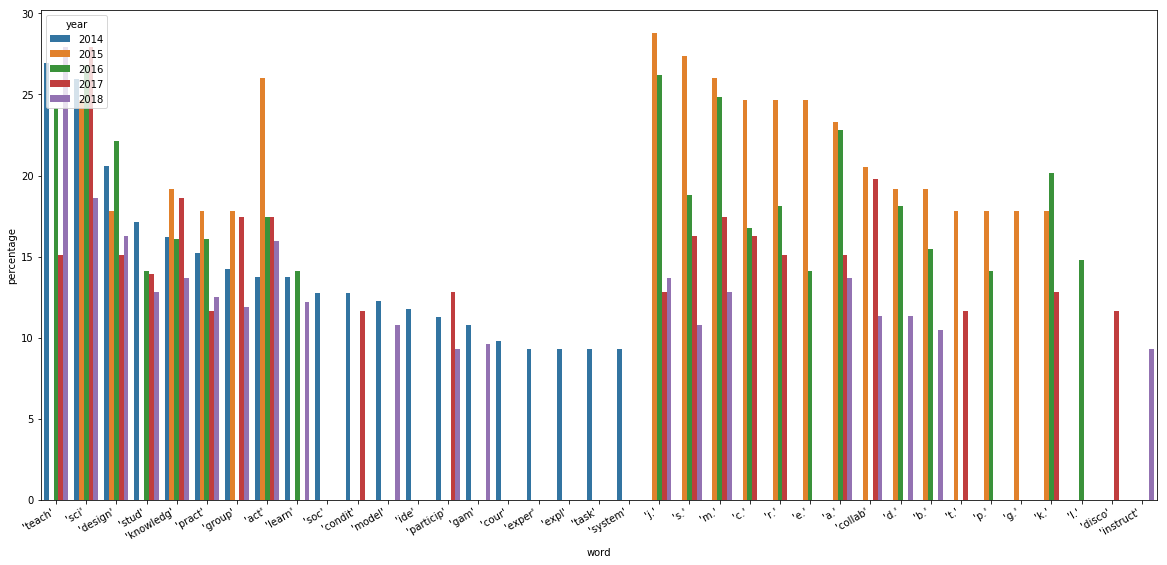

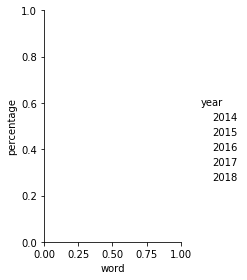

In [120]:
fig,ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 10)

sns.catplot(x="word", y="percentage",hue="year",
                data=count_df.iloc[tmp.level_1.values], kind="bar",
                height=4, aspect=.7,ax = ax)

# figure size in inches
fig.autofmt_xdate()


In [121]:
words_2014 = set(count_df[count_df['percentage']>5].groupby('year').get_group('2014')['word'])

In [122]:
words_2015 = set(count_df[count_df['percentage']>5].groupby('year').get_group('2015')['word'])

In [123]:
words_2018 = set(count_df[count_df['percentage']>5].groupby('year').get_group('2018')['word'])

In [124]:
words_2017 = set(count_df[count_df['percentage']>5].groupby('year').get_group('2017')['word'])

In [125]:
words_2016 = set(count_df[count_df['percentage']>5].groupby('year').get_group('2016')['word'])

In [126]:
words2015_ = words_2015-words_2018-words_2016-words_2017-words_2014

In [127]:
words2016_ = words_2016-words_2015-words_2018-words_2017-words_2014

In [128]:
words2017_ = words_2017-words_2015-words_2018-words_2016-words_2014

In [129]:
words2018_ = words_2018-words_2015-words_2016-words_2017-words_2014

In [130]:
words2014_ = words_2014-words_2015-words_2016-words_2017-words_2018

In [131]:
count_df.iloc[0]['word']

" 'teach'"

In [132]:
def percentage(year,words):
    percentage_dict = dict()
    for i,elem in count_df[count_df['percentage']>5].groupby('year').get_group(str(year)).iterrows():
        for elem in words:
            if count_df.iloc[i]['word'] == elem:
                percentage_dict[elem] = count_df.iloc[i]['percentage']
    dataframe = pd.DataFrame.from_dict(percentage_dict,orient='index',columns = {'percentage'})
    dataframe['year'] = year
    return dataframe

In [133]:
final_df = percentage(2014,words2014_).append(percentage(2015,words2015_)).append(percentage(2016,words2016_)).append(percentage(2017,words2017_)).append(percentage(2018,words2018_))


In [134]:
final_df.reset_index(inplace = True)
final_df.rename(columns = {'index':'word'},inplace = True)

In [135]:
dict_stemming

{'inc. to j. gouvea and the\ngordon and betty moore foundation through grant no. gbmf3475 to d. hamm': 'Inc. to J. Gouvea and the\nGordon and Betty Moore Foundation through Grant No. GBMF3475 to D. Hammer',
 '2015). volunteer teachers engaged\nstudents into networked learning/knowledge building activities with the support of collaborative platforms –\nknowledge forum (kf) and a desktop videoconferencing system (ivisit) and': '2015). Volunteer teachers engaged\nstudents into networked learning/knowledge building activities with the support of collaborative platforms –\nKnowledge Forum (KF) and a desktop videoconferencing system (iVisit) and',
 "b. (2016). “seeing it from a different light”: adolescents' video reflections about their\nmultimodal compositions. journal of adolescent & adult literaci": 'B. (2016). “Seeing it from a different light”: Adolescents’ video reflections about their\nmultimodal compositions. Journal of Adolescent & Adult Literacy',
 '2015). these activities leverag

In [136]:
final_df['word'] = final_df['word'].apply(lambda x : dict_stemming[x[x.find("'")+1:x.find("'",2)]])

In [137]:
final_df.head()

,word,percentage,year
0,test,5.392157,2014
1,levels,6.862745,2014
2,intervention,5.392157,2014
3,unit,7.352941,2014
4,expertise,5.392157,2014


In [138]:
final_df['word'][0][final_df['word'][0].find("'",0):final_df['word'][0].find("'",2)]

''

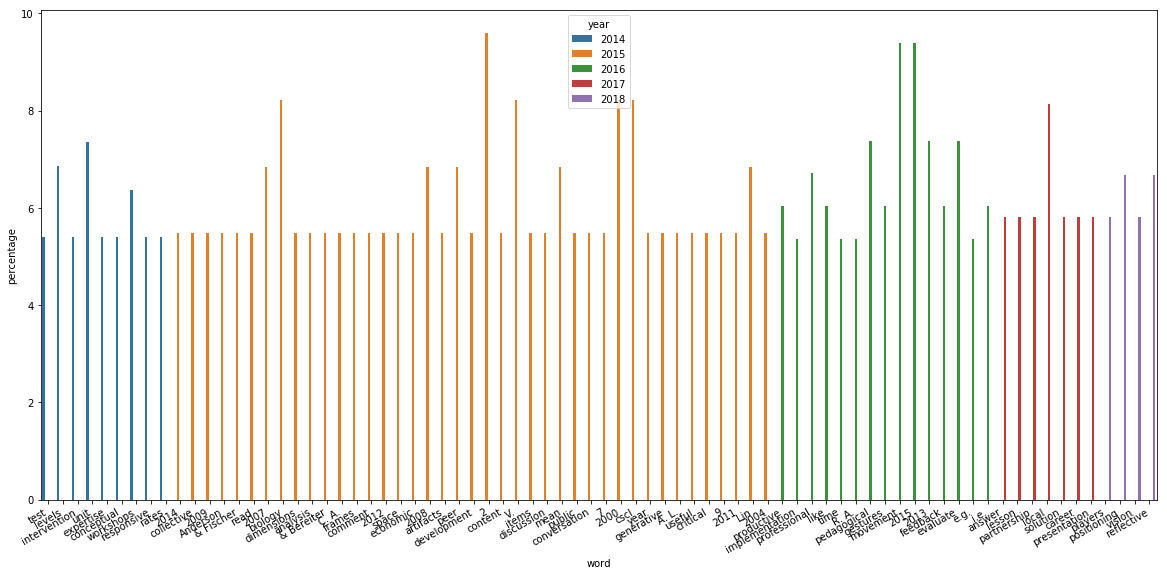

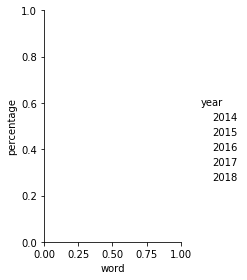

In [139]:
fig,ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 10)

sns.catplot(x="word", y="percentage",hue="year",
                data=final_df, kind="bar",
                height=4, aspect=.7,ax = ax)

# figure size in inches
fig.autofmt_xdate()
